##### 0)

In [8]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

##### 1)
Use basic Python operators to find the number of seconds in the month of June. Find the number of seconds that have lapsed between 14 Aug, 0930 and 1 June, 1200. 

In [9]:
timeNotYears = True # Is 0930 a time? Is 1200 a year? You decide!

secPmin = 60 # seconds per minute
minPhr = 60  # etc.
hrPday = 24
dayPjune = 30
secPjune = secPmin * minPhr * hrPday * dayPjune
secPjune
dayPyear = 360

if timeNotYears:
    startTime = 9.5 # in hours
    endTime = 12
    startDay = 226 # day number for 14 Aug obtained from the internet
    endDay = 152 # 1 June
    startYear = 2018
    endYear = 2019
    
else:
    startTime = 12
    endTime = 12
    startDay = 226 # 14 Aug
    endDay = 152 # 1 June
    startYear = 930
    endYear = 1200

leapYears = int((startYear%4 + (endYear-startYear))/4)
numYears = endYear-startYear
numDays = endDay-startDay + numYears*dayPyear + leapYears
numHrs = endTime-startTime + numDays*hrPday
numSec = numHrs * minPhr * secPmin
numSec

24719400.0

##### 2)
Import a table (‘world_population.csv’) and find:

In [10]:
popGlob = Table.read_table('data\world_population.csv').set_format('Population', NumberFormatter)
popGlob

Population
"2,557,628,654"
"2,594,939,877"
"2,636,772,306"
"2,682,053,389"
"2,730,228,104"
"2,782,098,943"
"2,835,299,673"
"2,891,349,717"
"2,948,137,248"
"3,000,716,593"


###### a.	The population in 2015 (the dataset begins at 1950). 

In [11]:
popGlob.row(2015-1950)

Row(Population=7256490011)

###### b.	The population growth between 1950 and 2015. 

In [12]:
popArr = popGlob.column('Population')
popArr[2015-1950] - popArr[1950-1950]

4698861357

###### c.	The annual growth rates over the course of the dataset

In [13]:
g = (popArr[2015-1950] / popArr[1950-1950]) ** (1/(2015-1950)) - 1
g

0.01617270380658975

##### 3)	
The ‘Titanic’ dataset describes passengers on the Titanic when it sank. Url:  https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv. Information about this dataset can be found at a kaggle site (https://www.kaggle.com/c/titanic). Import this dataset and answer the following questions: 

In [14]:
#boat = Table.read_table('https://raw.githubusercontent.com/oikobill/Kaggle/master/Titanic/data/train.csv')
boat = Table.read_table('Data\Titanic.csv')
boat

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


###### a.	Relabel the ‘Pclass’ column to ‘passenger_class’. 

In [15]:
boat.relabel("Pclass", "passenger_class")

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C


###### b.	Create a new column ‘family_size’ that adds the number of siblings/spouses, ‘SibSp’, to the number of children, ‘Parch’. 

In [16]:
boat = boat.with_column('family_size', boat.column('SibSp')+boat.column('Parch'))
boat

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.25,nan,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C,1
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.925,nan,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1,C123,S,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.05,nan,S,0
6,0,3,"Moran, Mr. James",male,nan,0,0,330877,8.4583,nan,Q,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.075,nan,S,4
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,nan,S,2
10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,nan,C,1


###### c.	Create a barplot of number of passengers, broken down by passenger class. HINT: you will need to use the group method on the dataset; for more info, see the datascience package help.  

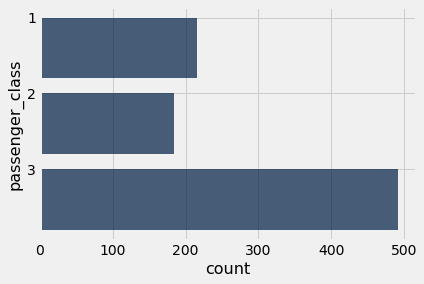

In [17]:
boat.group('passenger_class').barh('passenger_class')

###### d.	Sort the data by age and show the youngest 5 passengers. 

In [18]:
boat.sort('Age', descending=False).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,nan,C,1
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5,nan,S,2
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,nan,C,3
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,nan,C,3
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29,nan,S,2


###### e. Now sort by age from oldest to youngest and show the oldest 5 passengers. What did you notice? Eliminate these “nan” values and try again.

In [19]:
boat.sort('Age', descending=True).exclude[0:177].show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80,0,0,27042,30,A23,S,0
852,0,3,"Svensson, Mr. Johan",male,74,0,0,347060,7.775,nan,S,0
494,0,1,"Artagaveytia, Mr. Ramon",male,71,0,0,PC 17609,49.5042,nan,C,0
97,0,1,"Goldschmidt, Mr. George B",male,71,0,0,PC 17754,34.6542,A5,C,0
117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.75,nan,Q,0


###### f.	Find the survival rate for passengers of the Titanic, broken down by passenger class. (HINT: select the columns you care about and then apply the group method, summarizing with the mean.) 

In [20]:
deathCount = boat.group("Survived").column('count') # get sums of died & survived as array: idx is 0=died, 1=lived
rate = deathCount[1] / (deathCount[0]+deathCount[1])
rate

0.3838383838383838

###### g.	Now that you have some familiarity with the dataset, create two of your own questions and answer them.
Who paid the most for passage? (top 5)

Compare male to female survivor rates.

In [21]:
boat.sort('Fare', descending=True).show(5)

PassengerId,Survived,passenger_class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_size
738,1,1,"Lesurer, Mr. Gustave J",male,35,0,0,PC 17755,512.329,B101,C,0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,PC 17755,512.329,B51 B53 B55,C,1
259,1,1,"Ward, Miss. Anna",female,35,0,0,PC 17755,512.329,nan,C,0
439,0,1,"Fortune, Mr. Mark",male,64,1,4,19950,263,C23 C25 C27,S,5
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24,3,2,19950,263,C23 C25 C27,S,5


In [22]:
# Men first
deathCount = boat.where('Sex', 'male').group("Survived").column('count') # get sums of died & survived as array: idx is 0=died, 1=lived
rate = deathCount[1] / (deathCount[0]+deathCount[1])
print("Male survival rate: " + str(rate))
# Now women
deathCount = boat.where('Sex', 'female').group("Survived").column('count') # get sums of died & survived as array: idx is 0=died, 1=lived
rate = deathCount[1] / (deathCount[0]+deathCount[1])
print("Female survival rate: " + str(rate))

Male survival rate: 0.18890814558058924
Female survival rate: 0.7420382165605095
